# 3 paskaita: uždavyniai II

In [1]:
import pandas as pd
import numpy as np

mobiles = pd.read_csv('Amazon_Unlocked_Mobile.csv')

ratings = pd.read_csv('ratings.csv')

movie_titles = pd.read_csv('movie_titles.csv')

tags = pd.read_csv('tags.csv')

movies = pd.merge(ratings, movie_titles, on=['movieId'], how='left')
movies = pd.merge(movies, tags.drop(columns=['userId']), on='movieId', how='left')

In [2]:
mobiles.info()
mobiles.select_dtypes(include='object').columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413840 entries, 0 to 413839
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Product Name  413840 non-null  object 
 1   Brand Name    348669 non-null  object 
 2   Price         407907 non-null  float64
 3   Rating        413840 non-null  int64  
 4   Reviews       413778 non-null  object 
 5   Review Votes  401544 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 18.9+ MB


Index(['Product Name', 'Brand Name', 'Reviews'], dtype='object')

In [3]:
movies.info()
movies.select_dtypes(include='object').columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285762 entries, 0 to 285761
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userId       285762 non-null  int64  
 1   movieId      285762 non-null  int64  
 2   rating       285762 non-null  float64
 3   timestamp_x  285762 non-null  int64  
 4   title        285762 non-null  object 
 5   genres       285762 non-null  object 
 6   tag          233213 non-null  object 
 7   timestamp_y  233213 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 19.6+ MB


Index(['title', 'genres', 'tag'], dtype='object')

In [4]:
movies.head()

,userId,movieId,rating,timestamp_x,title,genres,tag,timestamp_y
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar,1.139046e+09
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar,1.137207e+09
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun,1.525286e+09
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy,1.143425e+09
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,old,1.143425e+09


In [5]:
movies['userId_new'] = movies['userId'].astype(str)
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285762 entries, 0 to 285761
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userId       285762 non-null  int64  
 1   movieId      285762 non-null  int64  
 2   rating       285762 non-null  float64
 3   timestamp_x  285762 non-null  int64  
 4   title        285762 non-null  object 
 5   genres       285762 non-null  object 
 6   tag          233213 non-null  object 
 7   timestamp_y  233213 non-null  float64
 8   userId_new   285762 non-null  object 
dtypes: float64(2), int64(3), object(4)
memory usage: 21.8+ MB


In [6]:
movies['concat'] = movies['userId_new'] + ' ' + movies['title']
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285762 entries, 0 to 285761
Data columns (total 10 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userId       285762 non-null  int64  
 1   movieId      285762 non-null  int64  
 2   rating       285762 non-null  float64
 3   timestamp_x  285762 non-null  int64  
 4   title        285762 non-null  object 
 5   genres       285762 non-null  object 
 6   tag          233213 non-null  object 
 7   timestamp_y  233213 non-null  float64
 8   userId_new   285762 non-null  object 
 9   concat       285762 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 24.0+ MB


In [7]:
mobiles['Brand Name'].str.startswith('Apple').value_counts()

False    290473
True      58196
Name: Brand Name, dtype: int64

In [8]:
movies['title'].str.startswith('Toy').value_counts()

False    284258
True       1504
Name: title, dtype: int64

In [9]:
movies['genres'].str.contains('Adventure').value_counts()

False    225685
True      60077
Name: genres, dtype: int64

In [10]:
mobiles.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0


In [11]:
mobiles['new_col'] = mobiles['Brand Name'] + " " + mobiles['Price'].astype(str)

In [12]:
mobiles['price_tmp'] = mobiles['new_col'].str.extract('([-+]?[0-9]*\.?[0-9]+)', expand=False)
mobiles.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,new_col,price_tmp
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,Samsung 199.99,199.99
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,Samsung 199.99,199.99
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Samsung 199.99,199.99
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,Samsung 199.99,199.99
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Samsung 199.99,199.99


In [13]:
mobiles['price_tmp1'] = mobiles['new_col'].str.extract('([a-zA-Z ]+)', expand=False)
mobiles.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,new_col,price_tmp,price_tmp1
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,Samsung 199.99,199.99,Samsung
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,Samsung 199.99,199.99,Samsung
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Samsung 199.99,199.99,Samsung
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,Samsung 199.99,199.99,Samsung
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Samsung 199.99,199.99,Samsung


In [14]:
movies.head()

,userId,movieId,rating,timestamp_x,title,genres,tag,timestamp_y,userId_new,concat
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar,1.139046e+09,1,1 Toy Story (1995)
1,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,pixar,1.137207e+09,1,1 Toy Story (1995)
2,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,fun,1.525286e+09,1,1 Toy Story (1995)
3,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,moldy,1.143425e+09,1,1 Grumpier Old Men (1995)
4,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,old,1.143425e+09,1,1 Grumpier Old Men (1995)


In [15]:
movies['genres'].str.split(pat='|', expand=True)

,0,1,2,3,4,5,6,7,8,9
0,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
1,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
2,Adventure,Animation,Children,Comedy,Fantasy,None,None,None,None,None
3,Comedy,Romance,None,None,None,None,None,None,None,None
4,Comedy,Romance,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...
285757,Action,Sci-Fi,None,None,None,None,None,None,None,None
285758,Action,Sci-Fi,None,None,None,None,None,None,None,None
285759,Action,Sci-Fi,None,None,None,None,None,None,None,None
285760,Action,Sci-Fi,None,None,None,None,None,None,None,None


In [16]:
mobiles.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,new_col,price_tmp,price_tmp1
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,Samsung 199.99,199.99,Samsung
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,Samsung 199.99,199.99,Samsung
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Samsung 199.99,199.99,Samsung
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,Samsung 199.99,199.99,Samsung
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Samsung 199.99,199.99,Samsung


In [17]:
mobiles['Brand Name'].str.contains('Samsung').value_counts()

False    281869
True      66800
Name: Brand Name, dtype: int64

In [18]:
mobiles['Brand Name'].str.count('Samsung').sum()

66800.0

In [19]:
mobiles['Brand Name'].str.count('Apple').sum()

58196.0

In [20]:
mobiles['Brand Name'].str.count('Nokia').sum()

16818.0

In [21]:
mobiles['Brand Name'].str.count('Huawei').sum()

3325.0

In [22]:
mobiles['Brand Name'].replace('Samsung','Huawei').str.count('Huawei').sum()

69072.0

In [23]:
movies['title'] = movies['title'].str.lower()

In [24]:
movies['title'].str.slice(0,5)

0         toy s
1         toy s
2         toy s
3         grump
4         grump
          ...  
285757    logan
285758    logan
285759    logan
285760    logan
285761    the f
Name: title, Length: 285762, dtype: object

In [25]:
from textblob import TextBlob

In [26]:
mobiles['new_reviews'] = mobiles['Reviews'].iloc[0:5]

In [27]:
mobiles.head()

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,new_col,price_tmp,price_tmp1,new_reviews
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,Samsung 199.99,199.99,Samsung,I feel so LUCKY to have found this used (phone...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,Samsung 199.99,199.99,Samsung,"nice phone, nice up grade from my pantach revu..."
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Samsung 199.99,199.99,Samsung,Very pleased
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,Samsung 199.99,199.99,Samsung,It works good but it goes slow sometimes but i...
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Samsung 199.99,199.99,Samsung,Great phone to replace my lost phone. The only...


In [28]:
mobiles_short = mobiles.head(5)


mobiles_short['Reviews'] = mobiles_short['Reviews'].transform(lambda x: TextBlob(x).translate(to='lt'))
mobiles_short['Reviews'] = mobiles_short['Reviews'].transform(lambda x: ''.join(x))

C:\Users\Asosi\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Asosi\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [29]:
mobiles_short

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,new_col,price_tmp,price_tmp1,new_reviews
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,"Aš jaučiuosi toks laimingas, kad radau šį pana...",1.0,Samsung 199.99,199.99,Samsung,I feel so LUCKY to have found this used (phone...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"gražus telefonas, gražus pažymys iš mano strai...",0.0,Samsung 199.99,199.99,Samsung,"nice phone, nice up grade from my pantach revu..."
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Labai patenkintas,0.0,Samsung 199.99,199.99,Samsung,Very pleased
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"Tai veikia gerai, bet kartais eina lėtai, tači...",0.0,Samsung 199.99,199.99,Samsung,It works good but it goes slow sometimes but i...
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Puikus telefonas pakeis mano pamestą telefoną....,0.0,Samsung 199.99,199.99,Samsung,Great phone to replace my lost phone. The only...


In [30]:
import numpy as np
from textblob import TextBlob

In [31]:
mask = mobiles['Reviews'].str.len() > 50
mobiles_short = mobiles.loc[mask, :].head(10)
mobiles_short

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,new_col,price_tmp,price_tmp1,new_reviews
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,Samsung 199.99,199.99,Samsung,I feel so LUCKY to have found this used (phone...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,Samsung 199.99,199.99,Samsung,"nice phone, nice up grade from my pantach revu..."
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,Samsung 199.99,199.99,Samsung,It works good but it goes slow sometimes but i...
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Samsung 199.99,199.99,Samsung,Great phone to replace my lost phone. The only...
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0,Samsung 199.99,199.99,Samsung,NaN
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0,Samsung 199.99,199.99,Samsung,NaN
7,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0,Samsung 199.99,199.99,Samsung,NaN
8,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0,Samsung 199.99,199.99,Samsung,NaN
9,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,It's battery life is great. It's very responsi...,0.0,Samsung 199.99,199.99,Samsung,NaN
10,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,"My fiance had this phone previously, but cause...",0.0,Samsung 199.99,199.99,Samsung,NaN


In [32]:
mobiles_short['polarity'] = mobiles_short['Reviews'].transform(lambda x:TextBlob(x).sentiment.polarity)

In [41]:
mobiles_short['sentimental'] = np.where(mobiles_short['polarity'] < 0.1, 'neigiamas', 'teigiamas')
mobiles_short


,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,new_col,price_tmp,price_tmp1,new_reviews,polarity,sentimental
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,Samsung 199.99,199.99,Samsung,I feel so LUCKY to have found this used (phone...,0.180952,teigiamas
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,Samsung 199.99,199.99,Samsung,"nice phone, nice up grade from my pantach revu...",0.449259,teigiamas
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,Samsung 199.99,199.99,Samsung,It works good but it goes slow sometimes but i...,0.452500,teigiamas
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Samsung 199.99,199.99,Samsung,Great phone to replace my lost phone. The only...,0.214583,teigiamas
5,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,1,I already had a phone with problems... I know ...,1.0,Samsung 199.99,199.99,Samsung,NaN,-0.300000,neigiamas
6,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,The charging port was loose. I got that solder...,0.0,Samsung 199.99,199.99,Samsung,NaN,0.019814,neigiamas
7,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,2,"Phone looks good but wouldn't stay charged, ha...",0.0,Samsung 199.99,199.99,Samsung,NaN,0.516460,teigiamas
8,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I originally was using the Samsung S2 Galaxy f...,0.0,Samsung 199.99,199.99,Samsung,NaN,0.267692,teigiamas
9,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,It's battery life is great. It's very responsi...,0.0,Samsung 199.99,199.99,Samsung,NaN,0.222222,teigiamas
10,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,3,"My fiance had this phone previously, but cause...",0.0,Samsung 199.99,199.99,Samsung,NaN,0.358333,teigiamas


In [45]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 

def generate_wordcloud(text):

    stopwords = set(STOPWORDS)

    wordcloud = WordCloud(width = 800, height = 800, 
                    background_color ='white', 
                    collocations=False,
                    stopwords = stopwords).generate(text) 

    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 

    plt.show() 

In [43]:
neigiami = " ".join(mobiles_short.query('sentimental == "neigiamas"')['Reviews'])
teigiami = " ".join(mobiles_short.query('sentimental == "teigiamas"')['Reviews'])

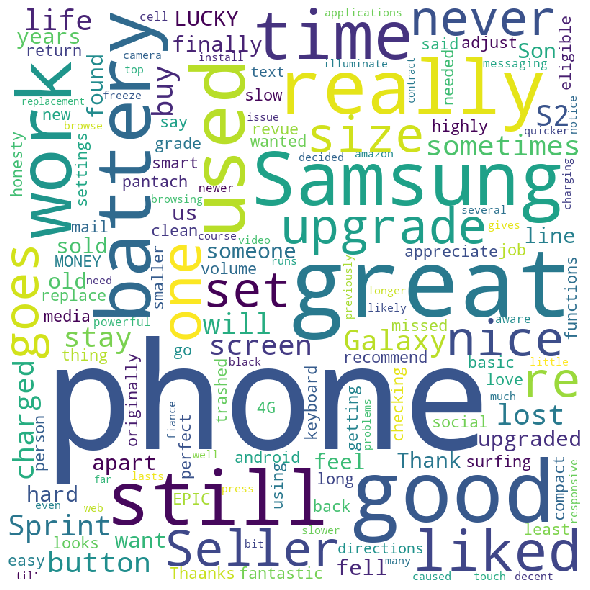

In [47]:
generate_wordcloud(teigiami)

In [54]:
mobiles

,Product Name,Brand Name,Price,Rating,Reviews,Review Votes,new_col,price_tmp,price_tmp1,new_reviews
0,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,I feel so LUCKY to have found this used (phone...,1.0,Samsung 199.99,199.99,Samsung,I feel so LUCKY to have found this used (phone...
1,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,"nice phone, nice up grade from my pantach revu...",0.0,Samsung 199.99,199.99,Samsung,"nice phone, nice up grade from my pantach revu..."
2,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,5,Very pleased,0.0,Samsung 199.99,199.99,Samsung,Very pleased
3,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,It works good but it goes slow sometimes but i...,0.0,Samsung 199.99,199.99,Samsung,It works good but it goes slow sometimes but i...
4,"""CLEAR CLEAN ESN"" Sprint EPIC 4G Galaxy SPH-D7...",Samsung,199.99,4,Great phone to replace my lost phone. The only...,0.0,Samsung 199.99,199.99,Samsung,Great phone to replace my lost phone. The only...
...,...,...,...,...,...,...,...,...,...,...
413835,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,another great deal great price,0.0,Samsung 79.95,79.95,Samsung,NaN
413836,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,Ok,0.0,Samsung 79.95,79.95,Samsung,NaN
413837,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,5,Passes every drop test onto porcelain tile!,0.0,Samsung 79.95,79.95,Samsung,NaN
413838,Samsung Convoy U640 Phone for Verizon Wireless...,Samsung,79.95,3,I returned it because it did not meet my needs...,0.0,Samsung 79.95,79.95,Samsung,NaN


In [60]:
mobiles['Product Name'].str.extract('([-+]?[0-9]*\.?[0-9]+)', expand = False).str.slice(0,5).head()

0    4
1    4
2    4
3    4
4    4
Name: Product Name, dtype: object

In [62]:
mobiles['Product Name'].str.extract('([a-zA-Z ]+)', expand = False).str.slice(0,5).head()

0    CLEAR
1    CLEAR
2    CLEAR
3    CLEAR
4    CLEAR
Name: Product Name, dtype: object

In [5]:
import pandas as pd

In [6]:
txt =  "Ryan has sent an invoice email to john.d@yahoo.com by using his email id ryan.arjun@gmail.com and he also shared a copy to his boss rosy.gray@amazon.co.uk on the cc part."

In [7]:
print(txt)

Ryan has sent an invoice email to john.d@yahoo.com by using his email id ryan.arjun@gmail.com and he also shared a copy to his boss rosy.gray@amazon.co.uk on the cc part.


In [8]:
df = pd.DataFrame({'col':[txt]})

In [9]:
df

,col
0,Ryan has sent an invoice email to john.d@yahoo...


In [81]:
def extractEmails(x):
    return x.str.extract('(?:[a-z0-9!#$%&*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&*+/=?^_`{|}~-]+)*|"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])', expand = False)

# (?:[a-z0-9!#$%&'*+/=?^_`{|}~-]+(?:\.[a-z0-9!#$%&'*+/=?^_`{|}~-]+)*|"(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21\x23-\x5b\x5d-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])*")@(?:(?:[a-z0-9](?:[a-z0-9-]*[a-z0-9])?\.)+[a-z0-9](?:[a-z0-9-]*[a-z0-9])?|\[(?:(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?)\.){3}(?:25[0-5]|2[0-4][0-9]|[01]?[0-9][0-9]?|[a-z0-9-]*[a-z0-9]:(?:[\x01-\x08\x0b\x0c\x0e-\x1f\x21-\x5a\x53-\x7f]|\\[\x01-\x09\x0b\x0c\x0e-\x7f])+)\])

In [82]:
test = extractEmails(txt)
test

AttributeError: 'str' object has no attribute 'str'

In [10]:
df['col'].str.extract('([a-zA-Z0-9+._-]+@[a-zA-Z0-9._-]+\.[a-zA-Z0-9_-]+)', expand = False)

0    john.d@yahoo.com
Name: col, dtype: object

In [11]:
df

,col
0,Ryan has sent an invoice email to john.d@yahoo...


In [16]:
import re

new = re.findall('[^,;\s]+@[^,;\s]+', txt)
new

TypeError: expected string or bytes-like object

In [18]:
new =  df['col'].str.findall('[^,;\s]+@[^,;\s]+')

In [21]:
for i in new:
    print(i)

['john.d@yahoo.com', 'ryan.arjun@gmail.com', 'rosy.gray@amazon.co.uk']
